In [1]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [2]:
import pandas as pd

In [3]:
train_data = pd.read_csv("drive/MyDrive/Internship/datasets/Goud/train_preprocessed.csv")
val_data = pd.read_csv("drive/MyDrive/Internship/datasets/Goud/validation_preprocessed.csv")
test_data = pd.read_csv("drive/MyDrive/Internship/datasets/Goud/test_preprocessed.csv")

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
train_data

,headline,categories
0,حكم ضد وزاره اعماره بتعويض قدره 13 مليار لشركه,"('جورنالات بلادي',)"
1,اعتقال مهاجم الريال رونالدو في فرنسا وها علاش صور,"('كود سبور',)"
2,اعتقال مهاجم الريال رونالدو في فرنسا وها علاش صور,"('كود سبور',)"
3,الاسود المحليين يستعدون للمربع الذهبي,"('كود سبور',)"
4,تحليل هذه ابرز النقط الضائعه في قضيه القتل بمراكش والتي تجعل الجريمه غامضه لحدود الساعه,"('آراء',)"
...,...,...
38659,الكبير لن يستطيع تلبيه دعوه غيريتس للمنتخب,"('آش واقع',)"
38660,سلمي رشيد ضيفه خيمه رمضان بدبي,"('ميديا وثقافة',)"
38661,الفنانه المغربيه ابتسام تسكت مطلوبه بوجده,"('الزين والحداكة',)"
38662,من بعد 15 العام تصوير تتمه فيلم ماروك لي كان نوض روينه,"('ميديا وثقافة',)"


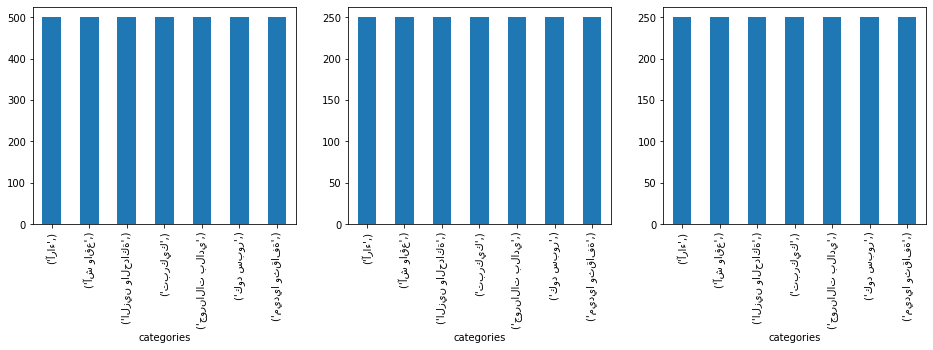

In [13]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(16,4))
train_data.groupby('categories')['headline'].count().plot.bar(ax=axs[0])
val_data.groupby('categories')['headline'].count().plot.bar(ax=axs[1])
test_data.groupby('categories')['headline'].count().plot.bar(ax=axs[2])

In [4]:
from sklearn.utils import resample

def downsample(data, column, n_samples):

  column_df = data[data["categories"] == column]

  data.drop(data[data["categories"] == column].index, inplace=True)

  column_downsampled = resample(column_df, replace=True, n_samples=n_samples, random_state=42)

  data = pd.concat([column_downsampled, data]).sort_index()

  return data

In [5]:
for categ in train_data["categories"].unique():
  train_data = downsample(train_data, categ, 500)

In [6]:
for categ in val_data["categories"].unique():
  val_data = downsample(val_data, categ, 250)

In [7]:
for categ in test_data["categories"].unique():
  test_data = downsample(test_data, categ, 250)

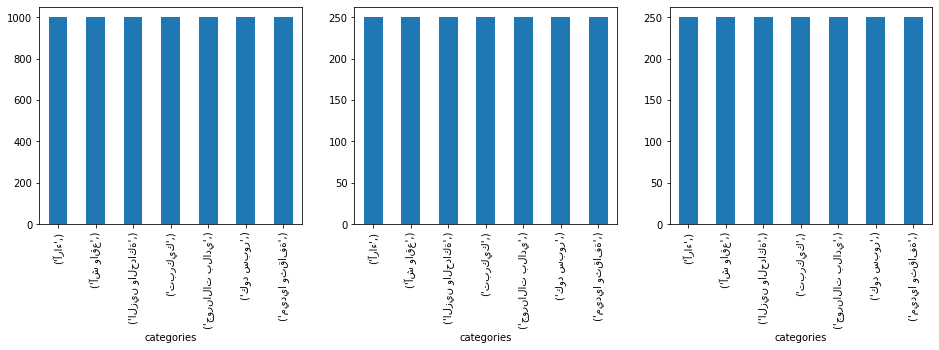

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(16,4))
train_data.groupby('categories')['headline'].count().plot.bar(ax=axs[0])
val_data.groupby('categories')['headline'].count().plot.bar(ax=axs[1])
test_data.groupby('categories')['headline'].count().plot.bar(ax=axs[2])

In [8]:
def categ2label(categ):
  labels_dict = {
      "('جورنالات بلادي',)" : 0,
      "('كود سبور',)" : 1,
      "('تبركيك',)" : 2,
      "('آراء',)" : 3,
      "('آش واقع',)" : 4,
      "('ميديا وثقافة',)" : 5,
      "('الزين والحداكة',)" : 6,
  }
  return labels_dict[categ]

In [9]:
train_data["label"] = train_data["categories"].apply(categ2label)
val_data["label"] = val_data["categories"].apply(categ2label)
test_data["label"] = test_data["categories"].apply(categ2label)

In [ ]:
train_data

,headline,categories,label
5,جورنالات بلادي1 اموال المبادره توجه لاحداث مقاه ومحلبات ومطالب بفتح تحقيق ودوزيم مهدده بالافلاس والدوله تتدخل لانقاذها,"('جورنالات بلادي',)",0
13,تلاعبات في ملايير وكاله تحدي الالفيه,"('جورنالات بلادي',)",0
20,الاستحواذ علي وثائق المؤرخ محمد بن عزوز حكيم جريمه ضد الوطن,"('آراء',)",3
27,حارس خنيفره يستفيق من غيبوبته,"('كود سبور',)",1
29,حتي فميريكان عندهم الفايد ديالهم رجال دين كيبيعو شي لعيبه من ماء جافيل وكيقولو باللي كتداوي الكونصير والسيدا وكورونا,"('تبركيك',)",2
...,...,...,...
38631,دار الضيافه ولات دار الصداع والمشاكل فبوسكوره,"('تبركيك',)",2
38640,فضيحه برلماني كيزور باش ياخد 7 ملايير,"('جورنالات بلادي',)",0
38643,الفيضانات تعري علي سياسه الدوله المركزيه,"('آراء',)",3
38655,الباطرونا الخاسر الاكبر في انتخابات رئاسه المستشارين اختارت التخندق سياسيا ووزير من الاغلبيه ل كود باش من وجه قادين يواجهونا ورجل اعمال ل كود بنا صغار وكراكيز,"('آراء',)",3


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(norm='l2', ngram_range=(1, 2))
features = tfidf.fit_transform(train_data['headline']).toarray()
labels = train_data["label"]
features.shape

(3500, 54761)

In [11]:
X_train = train_data["headline"]
y_train = train_data["label"]

X_val = val_data["headline"]
y_val = val_data["label"]

X_test = test_data["headline"]
y_test = test_data["label"]

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [17]:
val_data.iloc[3]

headline      مسطي صيفط 6 دالناس منهم 4 التلامذ للسبيطار نوا...
categories                                          ('تبركيك',)
label                                                         2
Name: 6, dtype: object

In [18]:
print(clf.predict(count_vect.transform([val_data['headline'].iloc[3]])))


[2]


NameError: ignored

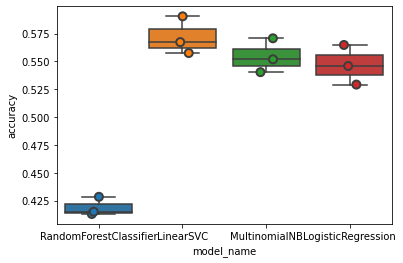

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 3
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [15]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.571710
LogisticRegression        0.546566
MultinomialNB             0.554282
RandomForestClassifier    0.418856
Name: accuracy, dtype: float64